# RED WINE EXPLORATORY DATA ANALYSIS

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# Loading the dataset for Red wine
df_red = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=";")

In [36]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [37]:
print('shape of the dataset:', df_red.shape)

shape of the dataset: (1599, 12)


There are 1599 observations with 12 different  variables. 11 are feature variables and 1 target variable (quality)

In [38]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are 11 variables and 1 response variable( quality) . Except quality all othere variables are of float datatype.

In [39]:
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in the dataset.

**We can see that there are spaces in the column headers. Let's rename the columns with underscore instead of spaces.**

In [40]:
df_red.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid',
                         'volatile acidity':'volatile_acidity','residual sugar':'residual_sugar',
                         'free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
df_red.head(n=5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
df_red.quality.unique()

array([5, 6, 7, 4, 8, 3])

The quality ranges from 1 to 10 - 1 being poor and 10 being the best. We can see the dataset has values 3,4,5,6,7,8. We can see we do not have any observations for  1 ,2 ,9 and 10 in our dataset.

In [42]:
df_red.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

This shows how our observations are distributed for our quality ratings. This can be clearly visualised using the following plot. We can see that we have very few observations for quality rating 3 , 4 and 8. Also majority of the observations are of average quality ( ratings 5 and 6)

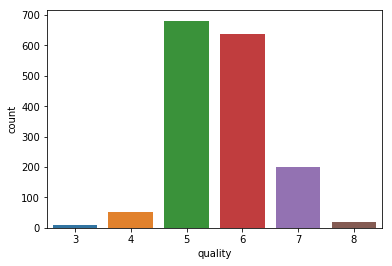

In [43]:
sns.countplot(x='quality', data=df_red)


**ANALYSING OUTLIERS IN THE DATASET**

In [44]:
df_red.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


 We can see that  chlorides,  residual_sugar,  free_sulphur_dioxide , total_sulphur_dioxide have outliers ( Huge difference between 75 percentile and max value) 

chlorides - We can see one outlier significantly far away for quality = 4 . There are few outliers for quality - 5, 6 and 7

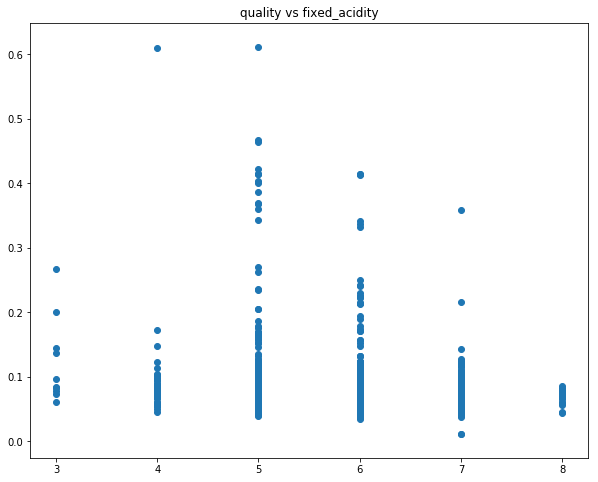

In [45]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter( df_red['quality'], df_red['chlorides'])
plt.title("quality vs fixed_acidity")
plt.show()

residual sugar - We can see one outlier significantly far away for quality = 4 . There are few outliers for quality - 5, 6, 7 and 8

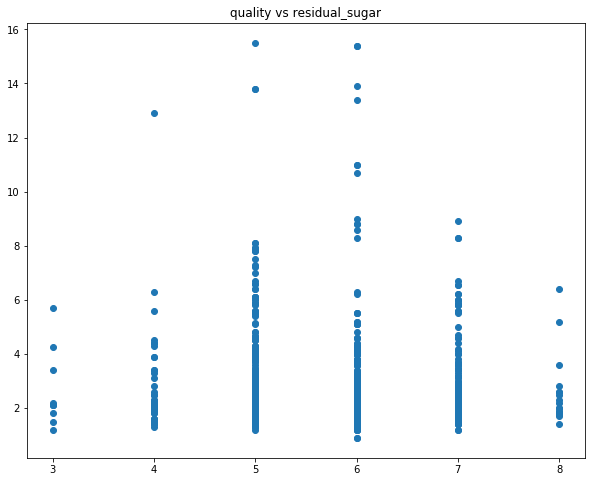

In [46]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter( df_red['quality'], df_red['residual_sugar'])
plt.title("quality vs residual_sugar")
plt.show()

free sulphur dioxide - we can see few outliers across all the quality ratings.


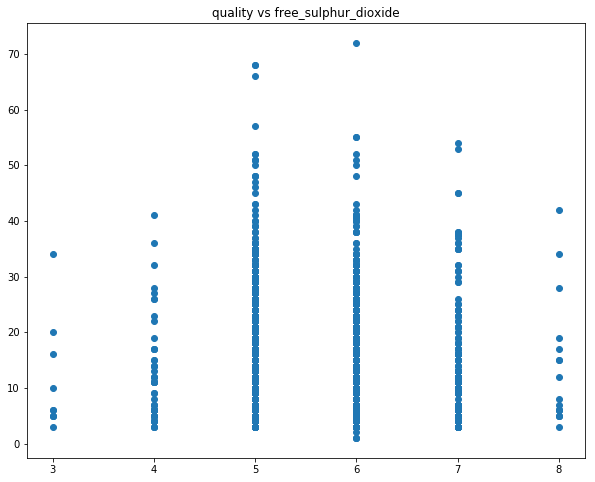

In [47]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter( df_red['quality'], df_red['free_sulfur_dioxide'])
plt.title("quality vs free_sulphur_dioxide")
plt.show()

total sulphur dioxide - Two observations are significantly far away for quality rating = 7. 

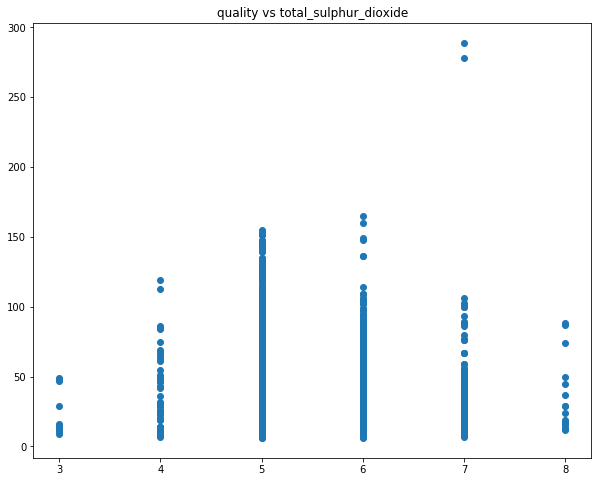

In [48]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter( df_red['quality'], df_red['total_sulfur_dioxide'])
plt.title("quality vs total_sulphur_dioxide")
plt.show()

# FACTORS AFFECTING QUALITY OF RED WINE

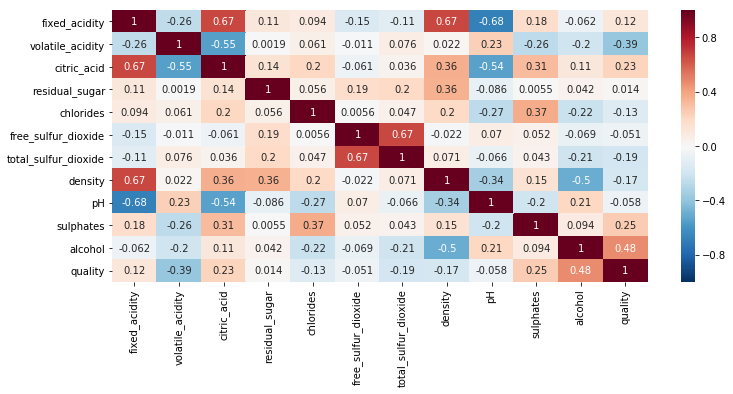

In [17]:
correlation = df_red.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")


In [18]:
correlation['quality'].sort_values(ascending=False)


quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

From the above data, it is clear that alcohol(0.43) has positive correlation with quality. sulphates, citric acid and fixed acidity  also have positive correlation with quality. It can also be noted there is a strong negative correlation with volatile acidity( -.39)

alcohol - We can see that higher quality of wines have higher alcohol content.

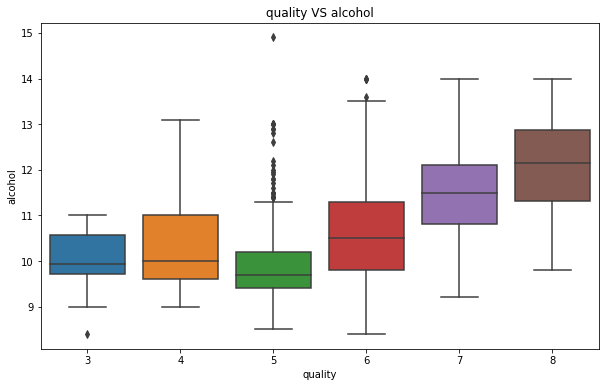

In [24]:
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.boxplot(x='quality', y='alcohol', data=df_red, ax=axs)
plt.title('quality VS alcohol')
plt.show()


sulphates - We can see that the level of sulphates increases as the quality increases.

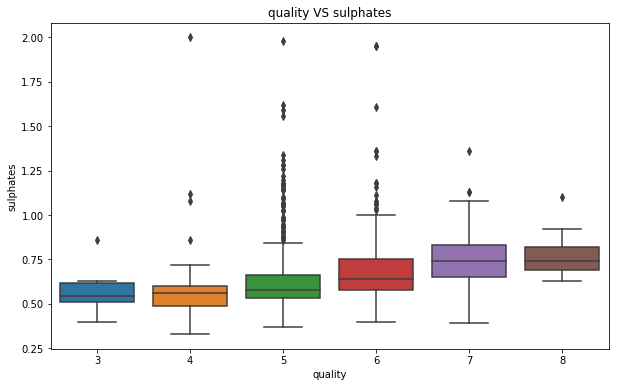

In [25]:
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
bx = sns.boxplot(x="quality", y='sulphates', data = df_red)
plt.title('quality VS sulphates')
plt.show()

citric acid - We can see the citric acid content is more in better qulaity of wines.

Text(0.5, 1.0, 'quality VS citric_acid')

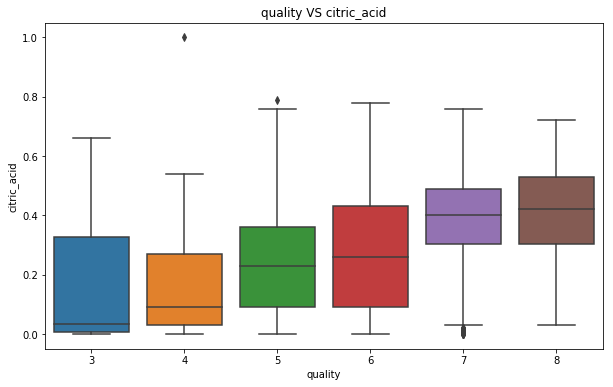

In [26]:
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.boxplot(x='quality', y='citric_acid', data=df_red, ax=axs)
plt.title('quality VS citric_acid')



volatile acidity - From the plot above, we can see that poor quality wine had more volatile acidity than the high quality wines.

Text(0.5, 1.0, 'quality VS volatile_acidity')

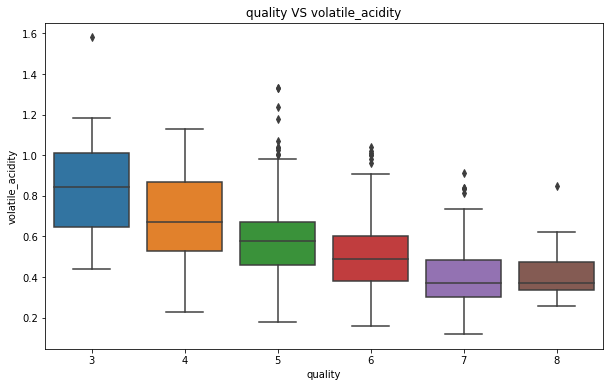

In [27]:
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.boxplot(x='quality', y='volatile_acidity', data=df_red, ax=axs)
plt.title('quality VS volatile_acidity')



density - we can see that high qulaity of wines had lesser density.

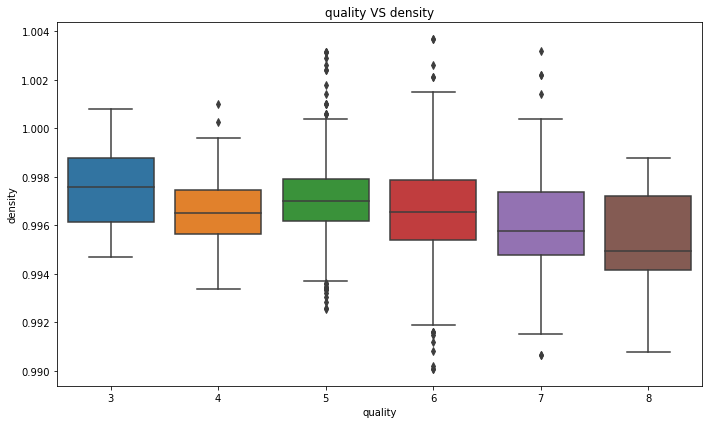

In [32]:
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.boxplot(x='quality', y='density', data=df_red, ax=axs)
plt.title('quality VS density')
plt.tight_layout()
plt.show()

pH - No significant change observed in pH values 

Text(0.5, 1.0, 'quality VS pH')

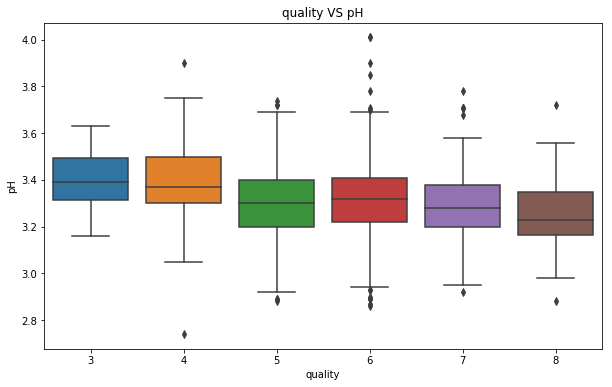

In [28]:
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.boxplot(x='quality', y='pH', data=df_red, ax=axs)
plt.title('quality VS pH')



residual_sugar - No significant change across different quality ratings. There are more outliers, this could also be one of the reasons for the mean value being same for different qualities.

Text(0.5, 1.0, 'quality VS residual_sugar')

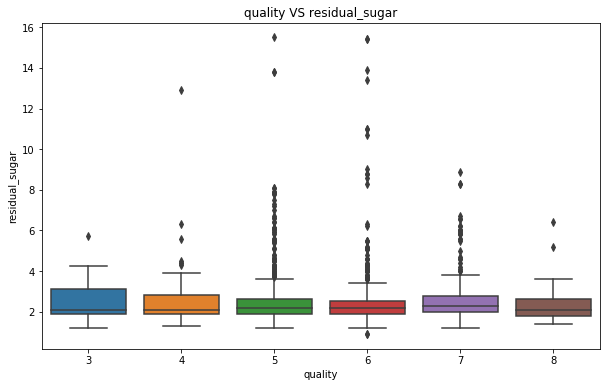

In [29]:
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.boxplot(x='quality', y='residual_sugar', data=df_red, ax=axs)
plt.title('quality VS residual_sugar')



total sulphur dioxide - No significant change across the quality ratings

Text(0.5, 1.0, 'quality VS Total sulphurdioxide')

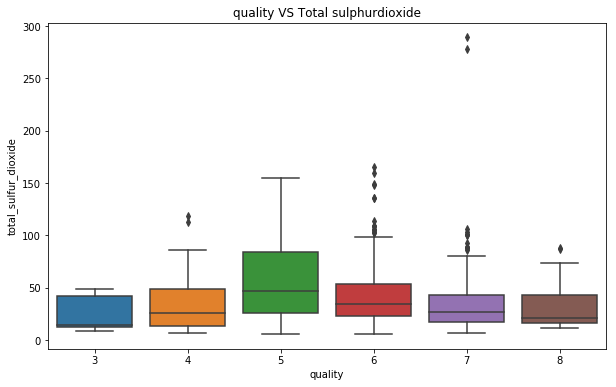

In [30]:
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
bx = sns.boxplot(x="quality", y='total_sulfur_dioxide', data = df_red)
plt.title('quality VS Total sulphurdioxide')


free sulphur dioxide - No significant change across the quality ratings

Text(0.5, 1.0, 'quality VS free sulphurdioxide')

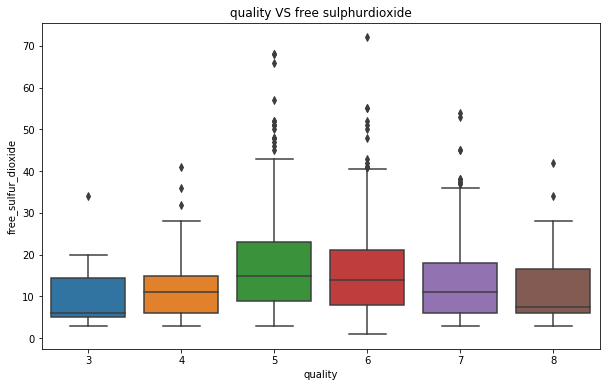

In [31]:
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
bx = sns.boxplot(x="quality", y='free_sulfur_dioxide', data = df_red)
plt.title('quality VS free sulphurdioxide')


chlorides -  No significant change across the quality ratings

Text(0.5, 1.0, 'quality VS chlorides')

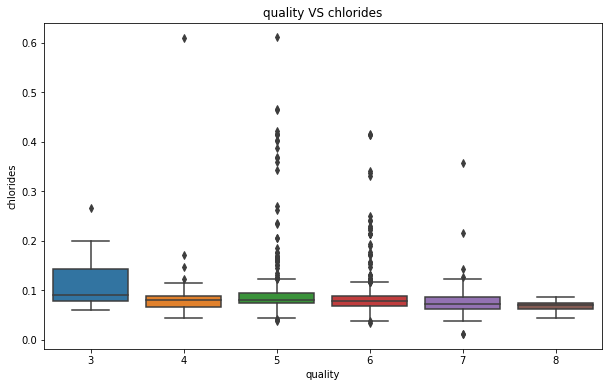

In [32]:
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.boxplot(x='quality', y='chlorides', data=df_red, ax=axs)
plt.title('quality VS chlorides')


## CONCLUSION -

DATASET has **1599 observations with 12 different variables**. 11 are feature variables and 1 target variable (quality)

**Count plot on quality ( target variable )** - We can see the dataset has values 3,4,5,6,7,8. We can see we do not have any observations for 1 ,2 ,9 and 10 in our dataset. Count plot shows how our observations are distributed for our quality ratings.  We can see that we have very few observations for quality rating 3 , 4 and 8. Also majority of the observations are of average quality ( ratings 5 and 6)



**OUTLIERS** - We can see that the residual_sugar, free_sulphur_dioxide , total_sulphur_dioxide have outliers ( Huge difference between 75 percentile and max value )

**chlorides** - We can see one outlier significantly far away for quality = 4 . There are few outliers for qulaity - 5, 6 and 7

**residual sugar** - We can see one outlier significantly far away for quality = 4 . There are few outliers for quality - 5, 6, 7 and 8

**free sulphur dioxide** - we can see few outliers across all the quality ratings.

**total sulphur dioxide** - Two observations are significantly far away for quality rating = 7. 


**FACTORS THAT AFFECT THE QUALITY OF WINE** - we can observe that Best quality red wines have high alochol content, sulphates and citric acid. It can also be observed that best quality wines had lesser volatile acidity and lesser density.